In [2]:
# pip install h5py

In [3]:
#Library imports
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
relative_path = './data/new_Input_CP_Studies_llqq_LinearTerm_29_September2025.h5'
with h5py.File(relative_path) as f:
    df = pd.DataFrame(f['LargeRJet']['1d'][:])

In [5]:
df.head()

,FJ_E,FJ_eta,FJ_flavour,FJ_mass,FJ_pT,FJ_phi,LeadingSubJet_E,LeadingSubJet_Eta,LeadingSubJet_Phi,LeadingSubJet_pT,...,SubLeadingSubJet_pT,Type,Vlep_E,Vlep_eta,Vlep_mass,Vlep_pT,Vlep_phi,cosThetaStar,costheta1,costheta2
0,407.988525,-0.047642,24,179.110809,366.154907,-1.597293,158.838379,-0.162127,-2.033952,156.202408,...,127.303368,9,622.253540,-1.024366,97.538742,390.898438,1.758167,-0.478246,0.575380,-0.103136
1,501.610718,1.522104,24,61.688316,207.413254,-1.410842,292.481689,1.317925,-1.502975,146.103394,...,63.371490,9,186.504578,-0.067021,88.982887,163.541092,2.036088,-0.702853,0.558812,0.222596
2,1056.896240,1.677390,24,187.753952,375.588715,-1.374967,435.359161,1.357581,-1.088245,209.986816,...,130.424454,9,451.566162,0.997758,90.997192,287.125671,1.923188,-0.381086,0.435688,0.183318
3,610.185425,1.193978,24,50.362614,337.535553,-2.136167,560.086670,1.224072,-2.164504,303.097565,...,35.610661,9,754.859619,1.330478,60.392387,371.832245,1.108286,0.094318,-0.898271,0.783347
4,238.106537,-0.321558,24,78.902725,213.518936,1.509094,159.344452,-0.292538,1.739846,152.398895,...,59.273563,9,199.662674,-0.139079,91.104294,175.961395,-1.778415,0.106941,-0.082847,0.359812


In [6]:
df.keys()

Index(['FJ_E', 'FJ_eta', 'FJ_flavour', 'FJ_mass', 'FJ_pT', 'FJ_phi',
       'LeadingSubJet_E', 'LeadingSubJet_Eta', 'LeadingSubJet_Phi',
       'LeadingSubJet_pT', 'Lep_pT_balance', 'Lumi_weight', 'NegLep_E',
       'NegLep_Eta', 'NegLep_Phi', 'NegLep_pT', 'Phi', 'Phi1', 'PosLep_E',
       'PosLep_Eta', 'PosLep_Phi', 'PosLep_pT', 'SubLeadingSubJet_E',
       'SubLeadingSubJet_Eta', 'SubLeadingSubJet_Phi', 'SubLeadingSubJet_pT',
       'Type', 'Vlep_E', 'Vlep_eta', 'Vlep_mass', 'Vlep_pT', 'Vlep_phi',
       'cosThetaStar', 'costheta1', 'costheta2'],
      dtype='object')

# Data Key Index:

## Leading index:

FJ: Fat Jet

LeadingSubJet: Smaller jet found within Fat Jet

NegLep, PosLep: Negative and Positively charged leptons

Vlep: reconstructed vector bosons (Z) that decay leptonically

## Secondary Index
E: Energy

Eta: Pseudorapidity

Phi: Azimuthal Angle

pT: transverse momentum

flavour: flavour of quark that initiated jet

mass: invariant mass 

## Extra
Leg_pT_balance: lepton transverse momentum balance

Lumi_weight: luminosity (used for determining signal vs background)

phi: Unsure

phi1: unsure

costhetastar: cosine of decay product in decaying particle frame

costheta1: unsure

costheta2: unsure

In [7]:
df.Lumi_weight

0        11868.624023
1       -11868.624023
2       -11868.624023
3       -11868.624023
4       -11868.624023
             ...     
43556    11899.651367
43557   -11899.651367
43558   -11899.651367
43559    11899.651367
43560   -11899.651367
Name: Lumi_weight, Length: 43561, dtype: float32

In [8]:
X = df.drop(columns=['Lumi_weight'])
y = df['Lumi_weight']

In [9]:
y

0        11868.624023
1       -11868.624023
2       -11868.624023
3       -11868.624023
4       -11868.624023
             ...     
43556    11899.651367
43557   -11899.651367
43558   -11899.651367
43559    11899.651367
43560   -11899.651367
Name: Lumi_weight, Length: 43561, dtype: float32

In [10]:
df.describe()

,FJ_E,FJ_eta,FJ_flavour,FJ_mass,FJ_pT,FJ_phi,LeadingSubJet_E,LeadingSubJet_Eta,LeadingSubJet_Phi,LeadingSubJet_pT,...,SubLeadingSubJet_pT,Type,Vlep_E,Vlep_eta,Vlep_mass,Vlep_pT,Vlep_phi,cosThetaStar,costheta1,costheta2
count,43561.000000,43561.000000,43561.0,43561.000000,43561.000000,43561.000000,43561.000000,43561.000000,43561.000000,43561.000000,...,43561.000000,43561.0,43561.000000,43561.000000,43561.000000,43561.000000,43561.000000,43561.000000,43561.000000,43561.000000
mean,602.549805,-0.002314,24.0,78.946289,371.117706,0.004045,422.072510,-0.002507,0.011179,265.560822,...,97.544273,9.0,629.900452,-0.001761,88.208153,375.835205,-0.002544,0.000151,-0.003384,0.394730
std,338.837280,1.033157,0.0,23.635155,164.490448,1.805536,292.033417,1.022547,1.804581,158.918045,...,59.588741,0.0,399.189545,1.066216,12.400199,180.011673,1.823111,0.446519,0.495226,0.299050
min,207.286118,-1.999514,24.0,50.010818,200.000992,-3.141559,50.550789,-2.279077,-3.141582,47.475327,...,0.000000,9.0,29.551390,-2.913099,0.288612,15.927018,-3.141517,-0.997782,-0.965397,-0.999999
25%,357.491821,-0.833593,24.0,70.079262,250.815674,-1.548136,226.271698,-0.818083,-1.541568,164.587509,...,55.731171,9.0,357.202271,-0.820333,88.388039,253.900024,-1.586069,-0.347701,-0.419826,0.186300
50%,509.679230,0.002316,24.0,76.334450,319.770630,0.012449,336.628754,-0.000717,0.028685,219.412842,...,87.191368,9.0,515.640198,-0.003714,90.765190,327.726257,-0.007454,-0.001513,-0.001823,0.400443
75%,750.495850,0.829706,24.0,81.224365,440.089722,1.561929,522.131836,0.814656,1.567097,311.025391,...,126.480179,9.0,783.993835,0.813424,92.638840,453.093323,1.583277,0.351207,0.409686,0.619229
max,3990.270996,1.999917,24.0,916.252747,1961.197388,3.141584,3990.270996,2.268116,3.141493,1898.839355,...,577.306763,9.0,4923.867188,2.621060,158.841202,2018.199463,3.141434,0.996926,0.990387,0.999988


In [11]:
scaled_data = (X - X.mean()) / X.std()

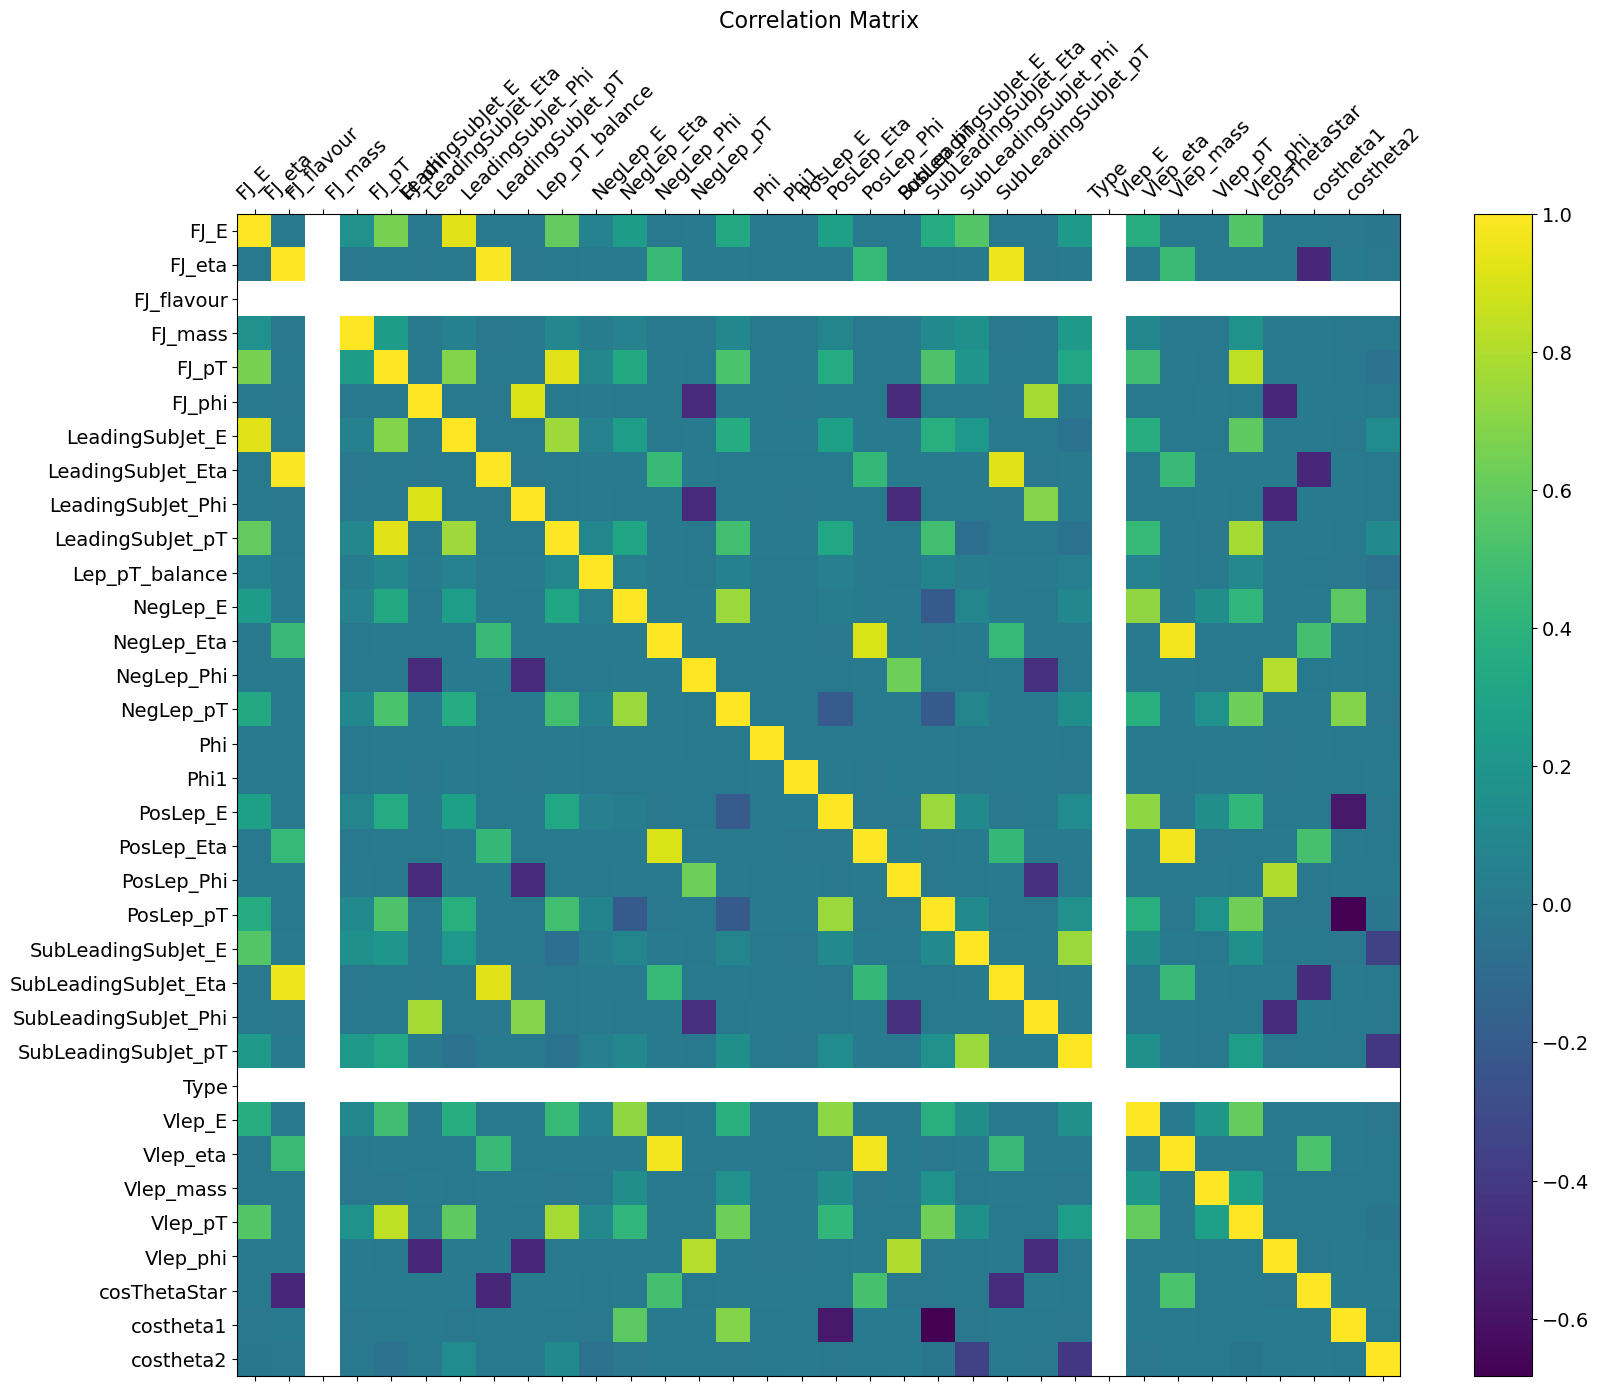

In [12]:
f = plt.figure(figsize=(19, 15))
plt.matshow(scaled_data.corr(), fignum=f.number)
plt.xticks(range(scaled_data.select_dtypes(['number']).shape[1]), scaled_data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(scaled_data.select_dtypes(['number']).shape[1]), scaled_data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [13]:
y[y>0] = 1
y[y<0] = 0

C:\Users\colel\AppData\Local\Temp\ipykernel_20160\3077716111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y>0] = 1
C:\Users\colel\AppData\Local\Temp\ipykernel_20160\3077716111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y<0] = 0


In [14]:
print("Number of signal events:", sum(y==1))
print("Number of background events:", sum(y==0))

Number of signal events: 21963
Number of background events: 21598


In [ ]:
y = np.array(y)

(43561,)